# Task 1: Get Data

In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.ticker as mtick

In [2]:
pro = ts.pro_api()

In [3]:
def get_index_daily(ts_code, start_date):
    '''
    To get specified index data and formalize it
    
    
    output: A dataframe corresponds to a data
    '''
    df = pro.index_daily(ts_code = ts_code, start_date = start_date, end_date = '')
    df['trade_date'] = pd.to_datetime(df['trade_date'].astype(str), format = '%Y-%m-%d')
    df.set_index('trade_date',inplace=True)
    return df

In [4]:
df_hs = get_index_daily(ts_code = '000300.SH', start_date = '20140930')

In [5]:
df_hs.head(5)

,ts_code,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2022-07-06,000300.SH,4423.9698,4475.4815,4484.3615,4393.4165,4489.5383,-65.5685,-1.4605,149800235.0,3.446727e+08
2022-07-05,000300.SH,4489.5383,4505.4572,4530.3245,4439.4511,4496.0303,-6.4920,-0.1444,154962415.0,3.618919e+08
2022-07-04,000300.SH,4496.0303,4447.2159,4496.0338,4427.8232,4466.7179,29.3124,0.6562,146345651.0,3.569685e+08
2022-07-01,000300.SH,4466.7179,4489.5204,4500.9853,4449.2914,4485.0108,-18.2929,-0.4079,144779599.0,3.184921e+08
2022-06-30,000300.SH,4485.0108,4418.0656,4514.9968,4418.0656,4421.3570,63.6538,1.4397,156666289.0,3.543439e+08


# Task 2: Build SMA

In [6]:
# 短期均线
df_hs['SMA10'] = df_hs['close'].rolling(10).mean()
# 长期均线
df_hs['SMA60'] = df_hs['close'].rolling(60).mean()

In [7]:
df_hs.iloc[0:15, :]

,ts_code,close,open,high,low,pre_close,change,pct_chg,vol,amount,SMA10,SMA60
trade_date,,,,,,,,,,,,
2022-07-06,000300.SH,4423.9698,4475.4815,4484.3615,4393.4165,4489.5383,-65.5685,-1.4605,149800235.0,3.446727e+08,NaN,NaN
2022-07-05,000300.SH,4489.5383,4505.4572,4530.3245,4439.4511,4496.0303,-6.4920,-0.1444,154962415.0,3.618919e+08,NaN,NaN
2022-07-04,000300.SH,4496.0303,4447.2159,4496.0338,4427.8232,4466.7179,29.3124,0.6562,146345651.0,3.569685e+08,NaN,NaN
2022-07-01,000300.SH,4466.7179,4489.5204,4500.9853,4449.2914,4485.0108,-18.2929,-0.4079,144779599.0,3.184921e+08,NaN,NaN
2022-06-30,000300.SH,4485.0108,4418.0656,4514.9968,4418.0656,4421.3570,63.6538,1.4397,156666289.0,3.543439e+08,NaN,NaN
2022-06-29,000300.SH,4421.3570,4472.7346,4503.1307,4413.9961,4490.5166,-69.1596,-1.5401,187276688.0,3.959261e+08,NaN,NaN
2022-06-28,000300.SH,4490.5166,4442.5811,4497.8949,4407.3519,4444.2639,46.2527,1.0407,174756489.0,3.616860e+08,NaN,NaN
2022-06-27,000300.SH,4444.2639,4414.3321,4472.6948,4414.3321,4394.7723,49.4916,1.1261,177385676.0,3.814330e+08,NaN,NaN
2022-06-24,000300.SH,4394.7723,4354.5530,4400.6852,4346.1221,4343.8781,50.8942,1.1716,168972199.0,3.560548e+08,NaN,NaN


# Task 3: Visualization

<AxesSubplot:title={'center':'HS300 stockprice| 10 & 60 days SMAs'}, xlabel='trade_date'>

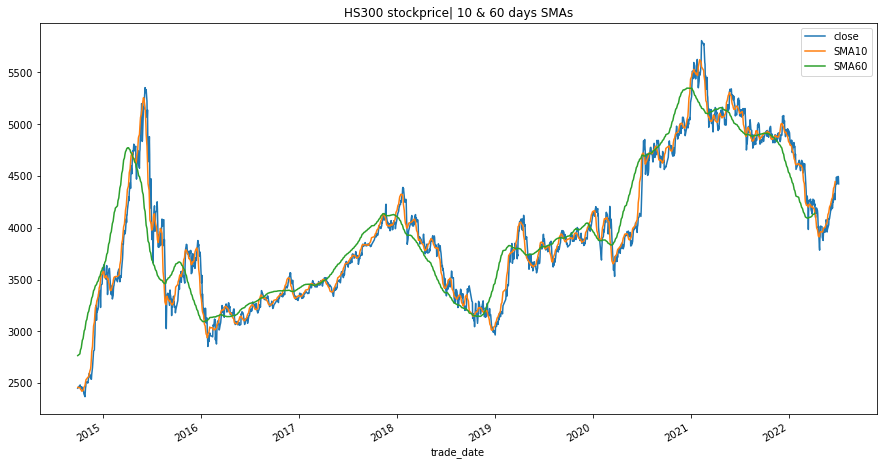

In [8]:
df_hs[['close','SMA10','SMA60']].plot(figsize=(15,8), title = 'HS300 stockprice| 10 & 60 days SMAs')

# Task 4: Trading Strategy

In [9]:
df_hs.dropna(inplace=True)

In [10]:
df_hs['position'] = np.where(df_hs['SMA10'] > df_hs['SMA60'], 1, -1)

<AxesSubplot:xlabel='trade_date'>

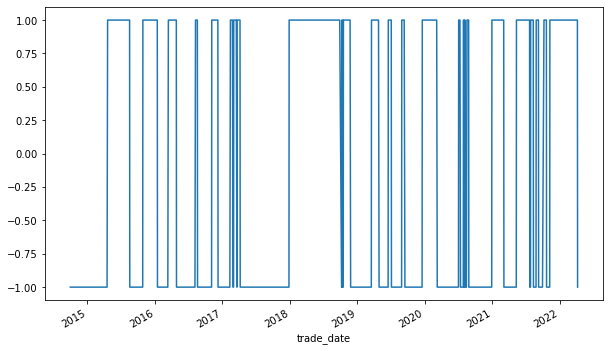

In [11]:
df_hs['position'].plot(secondary_y='Position', figsize=(10, 6))

# Task 5: Backtesting

In [12]:
# 计算大盘收益
df_hs['returns'] = np.log(df_hs['close'] / df_hs['close'].shift(1))

<AxesSubplot:xlabel='trade_date'>

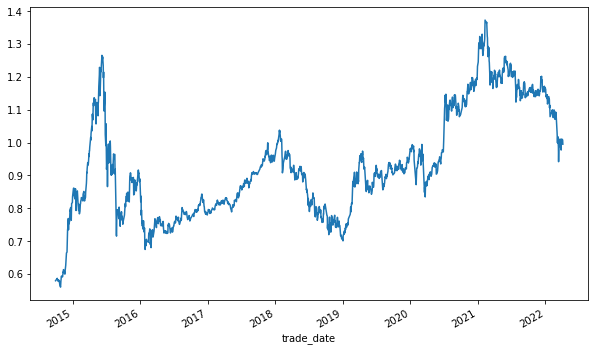

In [13]:
df_hs['returns'].cumsum().apply(np.exp).plot(figsize=(10,6))

In [14]:
df_hs.dropna(inplace=True)

In [15]:
# 计算策略收益
df_hs['strategy'] = df_hs['position'].shift(1) * df_hs['returns']

<AxesSubplot:xlabel='trade_date'>

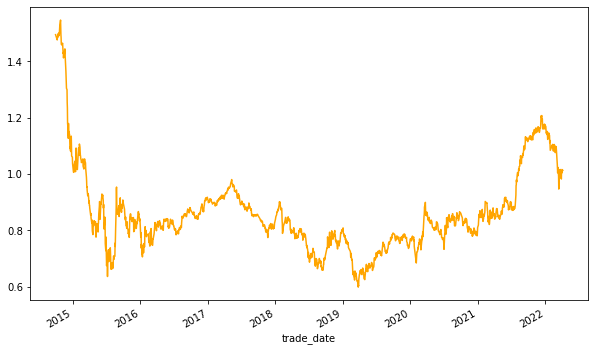

In [16]:
df_hs['strategy'].cumsum().apply(np.exp).plot(figsize=(10,6), color = 'orange')

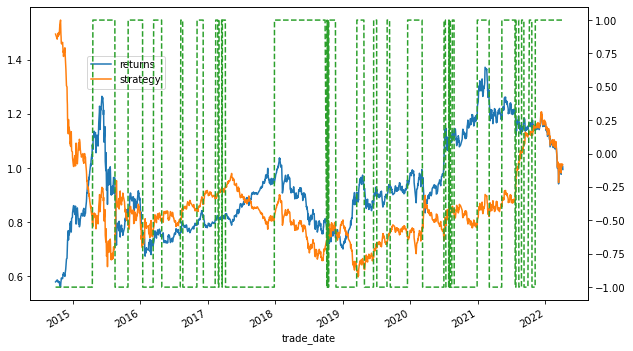

In [17]:
# cumulative sum 
ax = df_hs[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
df_hs['position'].plot(ax=ax, secondary_y='position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [18]:
# direct sum
np.exp(df_hs[['returns', 'strategy']].sum())

returns     0.579325
strategy    1.495375
dtype: float64